In [ ]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [ ]:
import pandas_datareader as pdr
import seaborn as sns
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as smf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys    

path = '/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/'
sys.path.append(path)

In [ ]:
eth_df = pd.read_csv(path + 'ETH-USD.csv')
# eth_df = eth_df.xs('Close', level='Attributes', axis=1, drop_level=True)
# eth_df.index = eth_df.index.astype('datetime64[ns]') 
eth_df.set_index('Date', inplace=True)
eth_df 

,Close,Volume
Date,,
01-01-20,130.802002,7935230330
02-01-20,127.410179,8032709256
03-01-20,134.171707,10476845358
04-01-20,135.069366,7430904515
05-01-20,136.276779,7526675353
...,...,...
08-11-22,1332.835571,42048003440
09-11-22,1100.169800,38864492427
10-11-22,1299.464600,28581002122


In [ ]:
nltk.download('stopwords')
# import spacy
# nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# !pip install -U spacy
# !pip install spacy
# !pip install spacy.load("en_core_web_sm")

In [ ]:
df= pd.read_csv(path+'ElonTweets.csv', index_col='Datetime', parse_dates=True)
df_crypto = pd.read_csv(path+'Crypto_tweets.csv', index_col ='Datetime', parse_dates=True)
df_ethereum = pd.read_csv(path+'#Ethereum_tweets.csv', index_col ='Datetime', parse_dates=True)
# df_eth = pd.read_csv('Eth_tweets.csv', index_col ='Datetime', parse_dates=True)
df_ETH2 = pd.read_csv(path+'$ETH_tweets.csv', index_col ='Datetime', parse_dates=True)

In [ ]:
df

,Unnamed: 0,Tweet Id,Text,Username
Datetime,,,,
2022-11-02 21:43:59+00:00,0,1587923502354472960,🤔 https://t.co/XuJdfMTTi1,elonmusk
2022-11-02 21:04:56+00:00,1,1587913672801759234,https://t.co/BYOBGBHOUA,elonmusk
2022-11-02 20:56:27+00:00,2,1587911540770222081,"@AOC Your feedback is appreciated, now pay $8",elonmusk
2022-11-02 20:09:41+00:00,3,1587899771091566595,Advertisers should support:,elonmusk
2022-11-02 19:53:20+00:00,4,1587895653182513152,@itsALLrisky 🤣,elonmusk
...,...,...,...,...
2019-10-14 16:30:37+00:00,9996,1183782167924506627,@annerajb @tesla_addicted Software,elonmusk
2019-10-14 16:30:13+00:00,9997,1183782068494295040,@SteveMartineau6 @annerajb @YogiSC1127 @Tesla Yes,elonmusk
2019-10-14 16:29:44+00:00,9998,1183781948939882496,@tesla_addicted Will start rendering traffic c...,elonmusk


In [ ]:
# df_eth = pd.read_csv('eth_tweets2.csv', index_col ='Datetime', parse_dates=True)

In [ ]:
df_tweets = df.iloc[:,2:]
df_crypto_tweets = df_crypto.iloc[:,2:]
df_ethereum_tweets = df_ethereum.iloc[:,2:]
df_ETH2_tweets = df_ETH2.iloc[:,2:] 
df_tweets.drop(columns=['Username'], inplace=True)
df_crypto_tweets.drop(columns=['Username'], inplace=True)
df_ethereum_tweets.drop(columns=['Username'], inplace=True)
df_ETH2_tweets.drop(columns=['Username'], inplace=True)

In [ ]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text

df_tweets['cleanedTweets'] = df_tweets['Text'].apply(cleanTweets) #apply cleanTweet function to the tweet
df_crypto_tweets['cleanedTweets'] = df_crypto_tweets['Text'].apply(cleanTweets)
df_ethereum_tweets['cleanedTweets'] = df_ethereum_tweets['Text'].apply(cleanTweets)
df_ETH2_tweets['cleanedTweets'] = df_ETH2_tweets['Text'].apply(cleanTweets)

df_tweets.head() #compares original tweets with cleaned Tweets
savedTweets = df_tweets.copy()
savedTweets_crypto = df_crypto_tweets.copy()
savedTweets_ethereum = df_ethereum_tweets.copy()
savedTweets_ETH2 = df_ETH2_tweets.copy() 


In [ ]:
#Get Subjectivity and Polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

savedTweets_crypto['Subjectivity'] = savedTweets_crypto['cleanedTweets'].apply(getSubjectivity)
savedTweets_crypto['Polarity'] = savedTweets_crypto['cleanedTweets'].apply(getPolarity)

savedTweets_ethereum['Subjectivity'] = savedTweets_ethereum['cleanedTweets'].apply(getSubjectivity)
savedTweets_ethereum['Polarity'] = savedTweets_ethereum['cleanedTweets'].apply(getPolarity)

savedTweets_ETH2['Subjectivity'] = savedTweets_ETH2['cleanedTweets'].apply(getSubjectivity)
savedTweets_ETH2['Polarity'] = savedTweets_ETH2['cleanedTweets'].apply(getPolarity)



In [ ]:
savedTweets

,Text,cleanedTweets,Subjectivity,Polarity
Datetime,,,,
2019-10-14 16:18:48+00:00,@tesla_truth @annerajb @YogiSC1127 @Tesla True,True,0.65,0.35
2019-10-14 16:27:15+00:00,@flcnhvy @aquastorm Venus would be very difficult,Venus would be very difficult,1.00,-0.65
2019-10-14 16:29:44+00:00,@tesla_addicted Will start rendering traffic c...,Will start rendering traffic cones in the dis...,0.00,0.00
2019-10-14 16:30:13+00:00,@SteveMartineau6 @annerajb @YogiSC1127 @Tesla Yes,Yes,0.00,0.00
2019-10-14 16:30:37+00:00,@annerajb @tesla_addicted Software,Software,0.00,0.00
...,...,...,...,...
2022-11-02 19:53:20+00:00,@itsALLrisky 🤣,🤣,0.00,0.00
2022-11-02 20:09:41+00:00,Advertisers should support:,Advertisers should support:,0.00,0.00
2022-11-02 20:56:27+00:00,"@AOC Your feedback is appreciated, now pay $8","Your feedback is appreciated, now pay $8",0.10,0.20


In [ ]:
# savedTweets = savedTweets[::-1] 

# savedTweets_crypto = savedTweets_crypto[::-1]

# savedTweets_ethereum = savedTweets_ethereum[::-1]

# savedTweets_ETH2 = savedTweets_ETH2[::-1]


In [ ]:
# savedTweets_ETH2.sort_values(by='Datetime')

# data.sort_values(by='AdmissionDate')

savedTweets_ETH2  

,Text,cleanedTweets,Subjectivity,Polarity
Datetime,,,,
2020-11-01 21:26:59+00:00,Let the Alt Season Begin! Go $ETH\n https://t....,Let the Alt Season Begin! Go $ETH,0.00000,0.000000
2020-11-01 21:27:13+00:00,Looking at a few alts and these 3 stood out:\n...,Looking at a few alts and these 3 stood out: ...,0.10000,-0.200000
2020-11-01 21:27:14+00:00,@TheCryptoLark $ETH just started pumping hard ...,$ETH just started pumping hard as we speak so...,0.69246,0.355159
2020-11-01 21:27:35+00:00,$kai Kardiachain \n\n👀flash sale on #uniswap! ...,$kai Kardiachain 👀flash sale on uniswap! H...,0.15000,-0.200000
2020-11-01 21:27:50+00:00,FalconSwap protocol:\n✅ Gasless transactions\n...,FalconSwap protocol: ✅ Gasless transactions ✅ ...,0.00000,0.000000
...,...,...,...,...
2020-11-09 23:55:03+00:00,"🐠 170 eth just entered in the lobby. \n14,203 ...","🐠 170 eth just entered in the lobby. 14,203 $...",0.75000,0.000000
2020-11-09 23:56:25+00:00,Imagine $ETH 2.0 will launch this coming Decem...,Imagine $ETH 2.0 will launch this coming Decem...,0.45000,0.225000
2020-11-09 23:57:37+00:00,"🐠 64 eth just entered in the lobby. \n14,284 $...","🐠 64 eth just entered in the lobby. 14,284 $E...",0.75000,0.000000


In [ ]:
# savedTweets.drop('Text', axis=1).head() 
# savedTweets_crypto.drop('Text', axis=1).head() 
# savedTweets_ethereum.drop('Text', axis=1).head() 
# savedTweets_ETH2.drop('Text', axis=1).head() 

,cleanedTweets,Subjectivity,Polarity
Datetime,,,
2020-11-09 23:59:07+00:00,"🐠 70 eth just entered in the lobby. 14,354 $E...",0.75,0.000
2020-11-09 23:58:02+00:00,ツイート数の多かった仮想通貨 1位 $BTC 400 Tweets 2位 $ETH 129 ...,0.00,0.000
2020-11-09 23:57:37+00:00,"🐠 64 eth just entered in the lobby. 14,284 $E...",0.75,0.000
2020-11-09 23:56:25+00:00,Imagine $ETH 2.0 will launch this coming Decem...,0.45,0.225
2020-11-09 23:55:03+00:00,"🐠 170 eth just entered in the lobby. 14,203 $...",0.75,0.000


In [ ]:
#Concat

tweets_concat = pd.concat([savedTweets_crypto, savedTweets_ethereum, savedTweets_ETH2])
tweets_concat


,Text,cleanedTweets,Subjectivity,Polarity
Datetime,,,,
2020-11-09 23:59:51+00:00,#Investing 137.3% in this optimal #crypto port...,Investing 137.3% in this optimal crypto portfo...,0.187500,-0.125000
2020-11-09 23:59:51+00:00,@RTB_Dutchy @strange56351869 @GenesisRipple @O...,90% of heavy crypto investors are pro tru...,0.540000,0.200000
2020-11-09 23:59:45+00:00,💸 Earn free #BTC and multiply crypto up to 15%...,💸 Earn free BTC and multiply crypto up to 15% ...,0.486667,0.308333
2020-11-09 23:59:44+00:00,Cryptosphere: The freewheeling world of crypto...,Cryptosphere: The freewheeling world of crypto...,0.000000,0.000000
2020-11-09 23:59:43+00:00,There`s never been a better time to invest in ...,There`s never been a better time to invest in ...,0.469697,0.257576
...,...,...,...,...
2020-11-01 21:27:50+00:00,FalconSwap protocol:\n✅ Gasless transactions\n...,FalconSwap protocol: ✅ Gasless transactions ✅ ...,0.000000,0.000000
2020-11-01 21:27:35+00:00,$kai Kardiachain \n\n👀flash sale on #uniswap! ...,$kai Kardiachain 👀flash sale on uniswap! H...,0.150000,-0.200000
2020-11-01 21:27:14+00:00,@TheCryptoLark $ETH just started pumping hard ...,$ETH just started pumping hard as we speak so...,0.692460,0.355159


In [ ]:
#Average Polarity of all the tweets 
avg_polarity = savedTweets.resample('D').mean() 
avg_polarity.dropna(inplace=True) 
avg_polarity.index = avg_polarity.index.rename('Date') 
avg_polarity.index = avg_polarity.index.astype('datetime64[ns]') 
avg_polarity 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  """


,Subjectivity,Polarity
Date,,
2019-10-14,0.394786,0.123635
2019-10-15,0.480795,0.217839
2019-10-16,0.333333,0.258333
2019-10-17,0.225000,-0.081667
2019-10-21,0.549495,0.202104
...,...,...
2022-10-29,0.261932,0.237879
2022-10-30,0.355179,0.172679
2022-10-31,0.220657,0.080939


In [ ]:
avg_polarity.to_csv(path + 'avg_polarity_Elon.csv')

In [ ]:
final_df = pd.concat([eth_close, avg_polarity], axis=1)
final_df.dropna(inplace=True)

<AxesSubplot:>

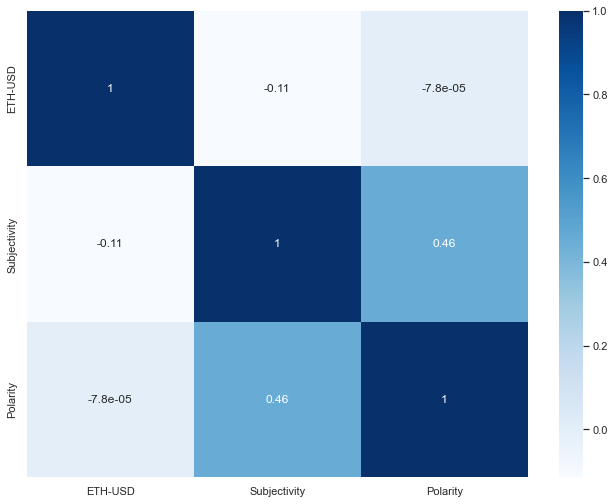

In [ ]:
cor= final_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor,cmap="Blues", annot=True)

In [ ]:
#do we want to make the shift here??
# final_df['ETH-USD']= final_df['ETH-USD'].shift(periods=-1)

In [ ]:
final_df_scaled = pd.DataFrame(preprocessing.scale(final_df))
final_df_scaled

,0,1,2
0,-1.092266,0.472094,-0.016368
1,-1.096445,1.008700,0.684047
2,-1.100502,0.088698,0.985126
3,-1.098986,-0.587182,-1.542811
4,-1.101324,1.437309,0.567057
...,...,...,...
1033,-0.014318,-0.356769,0.833044
1034,-0.036072,0.224989,0.348273
1035,-0.049667,-0.614281,-0.333823
1036,-0.044408,-0.493368,-0.737134


In [ ]:
# Linear regression - Polarity &subjectivity
LR_df = final_df_scaled.copy()
LR_df.replace([np.inf, -np.inf], np.nan, inplace=True)
LR_df.dropna(inplace=True)

X = LR_df.iloc[:,1:3]
Y = final_df['ETH-USD']
Y = Y.reset_index()
Y.drop(columns=['Date'], inplace=True)

X_test = X.iloc[519:]
X_train = X.iloc[:519]

Y_test = Y.iloc[519:]
Y_train = Y.iloc[:519]

LR= LinearRegression().fit(X_train, Y_train)
Y_pred_train = LR.predict(X_train)
Y_pred = LR.predict(X_test)
Y_pred

array([[670.95609422],
       [558.67421319],
       [463.33702731],
       [630.31675668],
       [691.06628187],
       [548.3398112 ],
       [662.57684937],
       [586.31121169],
       [654.19760451],
       [603.9221354 ],
       [683.5249615 ],
       [632.92030776],
       [569.25300982],
       [605.163505  ],
       [603.9221354 ],
       [582.51908176],
       [704.47307363],
       [616.02548907],
       [602.12658293],
       [595.63673217],
       [483.99918108],
       [565.51726315],
       [704.47307363],
       [615.09446187],
       [684.12347899],
       [590.21275979],
       [513.0538801 ],
       [635.20464951],
       [584.41288349],
       [619.91252766],
       [566.82249168],
       [601.31042271],
       [626.88747314],
       [704.47307363],
       [655.39463949],
       [593.2715934 ],
       [613.14776862],
       [659.78376775],
       [520.82795727],
       [683.5249615 ],
       [593.54783224],
       [369.30327951],
       [579.58430502],
       [579

In [ ]:
statistics_LR = smf.OLS(Y, smf.add_constant(X))
lR_summ = statistics_LR.fit()
lR_summ.summary()

/Users/adrytodaro/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ETH-USD   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.65
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           0.000232
Time:                        21:44:24   Log-Likelihood:                -8931.7
No. Observations:                1038   AIC:                         1.787e+04
Df Residuals:                    1036   BIC:                         1.788e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1638.7284     41.025     39.945      0.000    1558.227    1719.230
1           -151.5577     41.025     -3.694      0.000    -232.059     -71.056
==============================================================================
Omnibus:                      249.904   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.403
Skew:                           0.453   Prob(JB):                     9.44e-18
Kurtosis:                       2.005   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
rmse_train = r2_score(Y_train,Y_pred_train)
rmse_test = r2_score(Y_test,Y_pred)
print("R-squared training: {}".format(rmse_train))
print("R-squared test: {}".format(rmse_test))

R-squared training: 0.0071835491439085075
R-squared test: -4.58835393788323


In [ ]:
tweets_concat

,Text,cleanedTweets,Subjectivity,Polarity
Datetime,,,,
2020-11-09 23:59:51+00:00,#Investing 137.3% in this optimal #crypto port...,Investing 137.3% in this optimal crypto portfo...,0.187500,-0.125000
2020-11-09 23:59:51+00:00,@RTB_Dutchy @strange56351869 @GenesisRipple @O...,90% of heavy crypto investors are pro tru...,0.540000,0.200000
2020-11-09 23:59:45+00:00,💸 Earn free #BTC and multiply crypto up to 15%...,💸 Earn free BTC and multiply crypto up to 15% ...,0.486667,0.308333
2020-11-09 23:59:44+00:00,Cryptosphere: The freewheeling world of crypto...,Cryptosphere: The freewheeling world of crypto...,0.000000,0.000000
2020-11-09 23:59:43+00:00,There`s never been a better time to invest in ...,There`s never been a better time to invest in ...,0.469697,0.257576
...,...,...,...,...
2020-11-01 21:27:50+00:00,FalconSwap protocol:\n✅ Gasless transactions\n...,FalconSwap protocol: ✅ Gasless transactions ✅ ...,0.000000,0.000000
2020-11-01 21:27:35+00:00,$kai Kardiachain \n\n👀flash sale on #uniswap! ...,$kai Kardiachain 👀flash sale on uniswap! H...,0.150000,-0.200000
2020-11-01 21:27:14+00:00,@TheCryptoLark $ETH just started pumping hard ...,$ETH just started pumping hard as we speak so...,0.692460,0.355159


In [ ]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
tweets_concat['Analysis'] = tweets_concat['Polarity'].apply(getAnalysis)

In [ ]:
tweets_concat

,Text,cleanedTweets,Subjectivity,Polarity,Analysis
Datetime,,,,,
2020-11-09 23:59:51+00:00,#Investing 137.3% in this optimal #crypto port...,Investing 137.3% in this optimal crypto portfo...,0.187500,-0.125000,Negative
2020-11-09 23:59:51+00:00,@RTB_Dutchy @strange56351869 @GenesisRipple @O...,90% of heavy crypto investors are pro tru...,0.540000,0.200000,Positive
2020-11-09 23:59:45+00:00,💸 Earn free #BTC and multiply crypto up to 15%...,💸 Earn free BTC and multiply crypto up to 15% ...,0.486667,0.308333,Positive
2020-11-09 23:59:44+00:00,Cryptosphere: The freewheeling world of crypto...,Cryptosphere: The freewheeling world of crypto...,0.000000,0.000000,Neutral
2020-11-09 23:59:43+00:00,There`s never been a better time to invest in ...,There`s never been a better time to invest in ...,0.469697,0.257576,Positive
...,...,...,...,...,...
2020-11-01 21:27:50+00:00,FalconSwap protocol:\n✅ Gasless transactions\n...,FalconSwap protocol: ✅ Gasless transactions ✅ ...,0.000000,0.000000,Neutral
2020-11-01 21:27:35+00:00,$kai Kardiachain \n\n👀flash sale on #uniswap! ...,$kai Kardiachain 👀flash sale on uniswap! H...,0.150000,-0.200000,Negative
2020-11-01 21:27:14+00:00,@TheCryptoLark $ETH just started pumping hard ...,$ETH just started pumping hard as we speak so...,0.692460,0.355159,Positive


In [ ]:
tweets_concat['Analysis'].value_counts() #shows the counts of tweets' polarity

Neutral     45825
Positive    43579
Negative    10599
Name: Analysis, dtype: int64

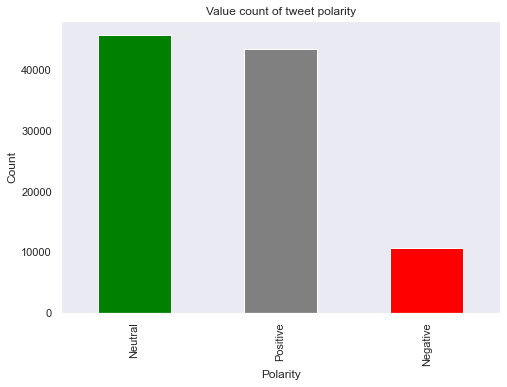

In [ ]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
tweets_concat['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

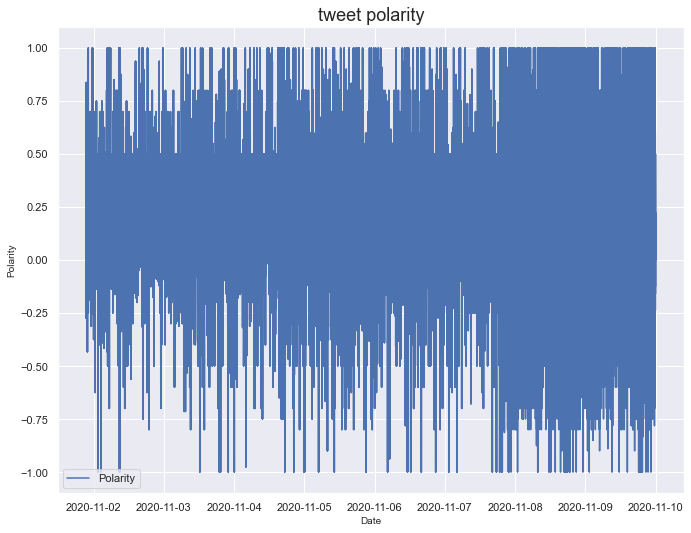

In [ ]:
sns.set(rc={'figure.figsize': (10,8)})
plt.xlabel("Date", fontsize=10)
plt.ylabel("Polarity", fontsize=10)
plt.title("tweet polarity", fontsize=18)
plt.plot(tweets_concat['Polarity'], label="Polarity")
plt.legend(loc='lower left')
# plt.savefig('Roll_futures.png')

In [ ]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,tweets_concat.shape[0]):
    plt.scatter(tweets_concat['Polarity'][i],tweets_concat['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# #create a function for wordcloud
def create_wordcloud(text):
    # here change the world
    allWords = 'Crypto ETH Ethereum'.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = tweets_concat.loc[tweets_concat['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = tweets_concat.loc[tweets_concat['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

In [ ]:
savedTweets

,Text,cleanedTweets,Subjectivity,Polarity,Analysis
Datetime,,,,,
2022-11-02 21:43:59+00:00,🤔 https://t.co/XuJdfMTTi1,🤔,0.00,0.00,Neutral
2022-11-02 21:04:56+00:00,https://t.co/BYOBGBHOUA,,0.00,0.00,Neutral
2022-11-02 20:56:27+00:00,"@AOC Your feedback is appreciated, now pay $8","Your feedback is appreciated, now pay $8",0.10,0.20,Positive
2022-11-02 20:09:41+00:00,Advertisers should support:,Advertisers should support:,0.00,0.00,Neutral
2022-11-02 19:53:20+00:00,@itsALLrisky 🤣,🤣,0.00,0.00,Neutral
...,...,...,...,...,...
2019-10-14 16:30:37+00:00,@annerajb @tesla_addicted Software,Software,0.00,0.00,Neutral
2019-10-14 16:30:13+00:00,@SteveMartineau6 @annerajb @YogiSC1127 @Tesla Yes,Yes,0.00,0.00,Neutral
2019-10-14 16:29:44+00:00,@tesla_addicted Will start rendering traffic c...,Will start rendering traffic cones in the dis...,0.00,0.00,Neutral


In [ ]:
#break each tweet sentence into words
sentences = []
for word in tweets_concat['cleanedTweets']:
    sentences.append(word)
sentences
lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10] #shows first 10 words in the first tweet

['🤔',
 'Your',
 'feedback',
 'is',
 'appreciated,',
 'now',
 'pay',
 '$8',
 'Advertisers',
 'should']

In [ ]:
#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    #nlp has more stopwords - couldnt install it!!
    if word not in stopwords.words('english'):
        stem2.append(word)
#creates a new dataframe for the stem and shows the count of the most used words
df = pd.DataFrame(stem2)
df=df[0].value_counts()
df #shows the new dataframe

&amp;    1402
tesla     546
make      326
good      296
need      295
         ... 
were.       1
lose,       1
grue.       1
odd?        1
venus       1
Name: 0, Length: 13893, dtype: int64

/Users/adrytodaro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adrytodaro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


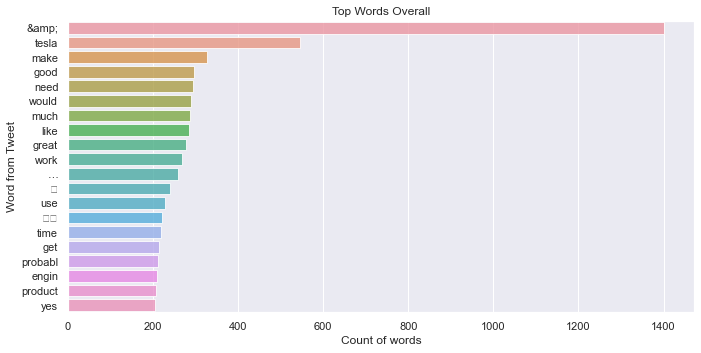

In [ ]:
#plots the top 20 used words
df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# print(stopwords.words('english'))

In [ ]:
#Linear regression

